# Описание проекта:
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

### Импортируем нужные нам библиотеки и познакомимся с данными.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим на уникальные значения в каждом столбце:

In [3]:
for column in data.columns:
    print(column)
    print(data[column].unique())
    print()

Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

NA_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.06

In [4]:
data.isna().sum() #посмотрим на пропуски

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Что мы видим в наших данных:

1. Типы, представленные в нашем датасете

- Категориальные: Name, Platform, Genre, Rating.

- Количественные: Year_of_Release,NA_sales, EU_sales, JP_sales, Other_sales,Critic_Score,User_Score.

- Дубликатов не имеется.

2. Что нужно сделать:

- Необходимо привести к правильному типу столбец Year_of_Release.(нужен int, а не float)
- Поменять формат столбца User_Score на float
- Нужно привести к нижнему регистру столбцы нашей таблицы
- Имеются пустые значения(и достаточно много) в столбцах Rating, User_Score, Critic_Score. 
- Заменить имеющиеся пустые значения в таблице Year_Of_Release.


### Предобработка данных

#### Приводим названия столбцов к нижнему регистру, а также значения в столбцах name, platform, genre, rating. Также в этом шаге приводим столбцы к нужному нам типу.

In [5]:
data.columns = data.columns.str.lower()
data.columns

for column in data[['name','platform','genre','rating']]:
    data[column] = data[column].str.lower()
    
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- Приведём столбец year_of_release к типу int:

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [7]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- Разберёмся с аббревиатурой TBD.

Аббревиатура TBD имеет несколько расшифровок. Так как у нас игровая сфера, подойдёт расшифровка 'To Be Determined' - 'Будет определено'.Это то же самое, что неизвестное значение, а значит можно заменить значение 'tbd' на 'NaN'.

In [8]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

- Поменяем формат столбца user_score на float

In [9]:
data['user_score'] = data['user_score'].astype(float)
data['user_score'].dtype

dtype('float64')

#### Обработка пропусков

In [10]:
data['year_of_release'].isna().sum()

269

Итак, у нас 269 пропущенных значений. Проверим вариант, что игра выпускалась не на одной платформе, а на нескольких и если там есть значение в нужном нам столбце(year_of_release), то можно будет его использовать.

In [11]:
#смотрим на конкретные строки с именами, где не указан год:
data[data['year_of_release'].isnull() == True] 

# возьмём игру fifa soccer 2004:
data.query('name == "fifa soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,ps2,<NA>,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
2606,fifa soccer 2004,xb,2003,sports,0.24,0.49,0.00,0.05,82.0,8.2,e
12029,fifa soccer 2004,gc,2003,sports,0.05,0.01,0.00,0.00,83.0,6.2,e
13086,fifa soccer 2004,gba,2003,sports,0.04,0.01,0.00,0.00,82.0,7.9,e


Вариант оказался рабочим, а значит мы можем попробовать восстановить значения(не все,но какую-то часть, думаю, получится). Для этого мы напишем цикл:

In [12]:
for year in data[data['year_of_release'].isnull() == True].index:  
    data['year_of_release'][year] = data.loc[data['name'] == data['name'][year], 'year_of_release'].max()
    
    
data['year_of_release'].isna().sum()
# #получилось восстановить 123 пропуска
# #по совету преподавателя остальные строки удаляю    
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'].isna().sum()

0

In [13]:
data.dropna(subset=['name'], inplace=True) #удаление пропусков в столбце name
data.dropna(subset=['genre'], inplace=True) #удаление пропусков в столбце genre


In [14]:
data['rating'] = data['rating'].fillna('Unknown')

In [15]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         9027
rating                0
dtype: int64

- Посчитаем суммарные продажи во всех регионах и запишeм их в отдельный столбец.

In [16]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


### Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы.

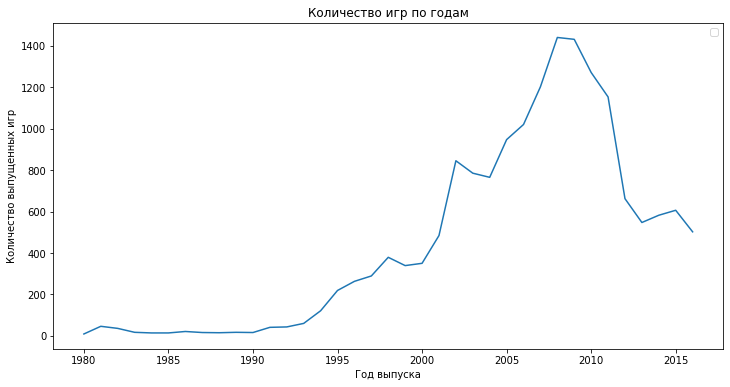

In [17]:
games_different_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_different_year)
sns.set_style('whitegrid')
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')
plt.show()

Вывод по графику:

- Из графика видно, что с начала 90-х годов количество игр начинает ежегодно расти. Это можно объяснить развитием компьютеров: широким внедрением CD-ROM для распространения и хранения данных, распространением операционных систем, таких как Microsoft Windows и Mac OS, основывающихся на GUI. Постепенно набирали популярность игровые приставки, такие как Nintendo(год создания 1983), Playstation(год создания 1994), позже XBOX(год создания 2001). Данный рост продолжается до 2008 года.

- В конце 90-х рост скорости доступа в интернет делает возможным становление браузера как самостоятельной игровой платформы. Разработчики игр теперь  не могут игнорировать браузерную платформу и внутри нее выделяется отдельная платформа и игры под нее. Все это + появление мобильных платформ iOS и Android на рубеже 2008 года, поспособствовало частичной смене внимания в пользу мобильных приложений и мобильных игр. Отсюда виден резкий спад консольных игр, начиная с 2009 по 2016гг.

#### Посмотрим, как менялись продажи по платформам .Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

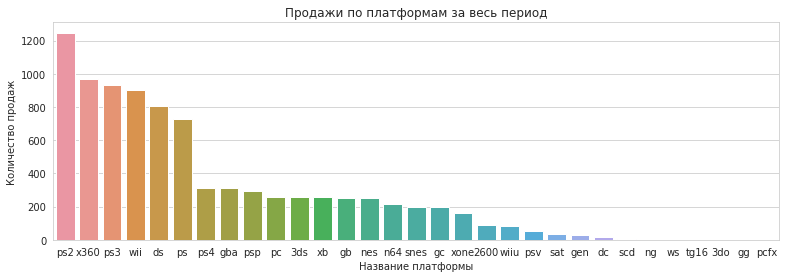

In [18]:
sales_on_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(13,4))
sns.barplot(x=sales_on_platform.index,y=sales_on_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

В полученном графике наглядно видно, что платформы с наибольшими суммарными продажами это - PS2, X360, PS3, WII, DS, PS.

- Составим список всех платформ и построим распределение по годам для каждой платформы:

In [19]:
platform_grouped = sales_on_platform.reset_index()

top_platforms = platform_grouped['platform'].unique()
top_platforms


array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', 'pc',
       '3ds', 'xb', 'gb', 'nes', 'n64', 'snes', 'gc', 'xone', '2600',
       'wiiu', 'psv', 'sat', 'gen', 'dc', 'scd', 'ng', 'ws', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

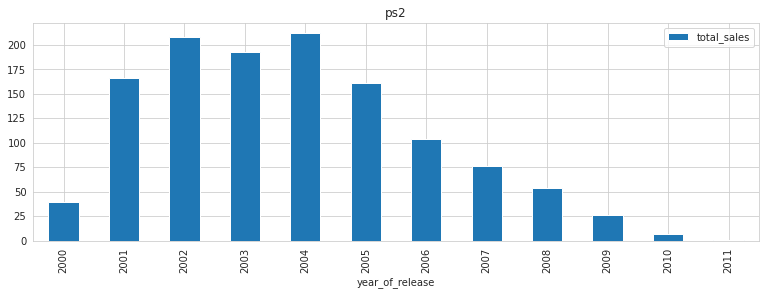

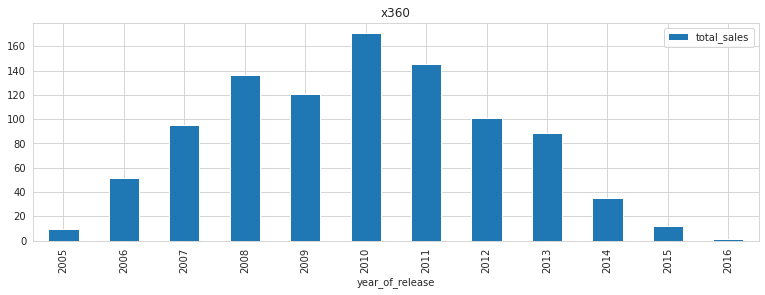

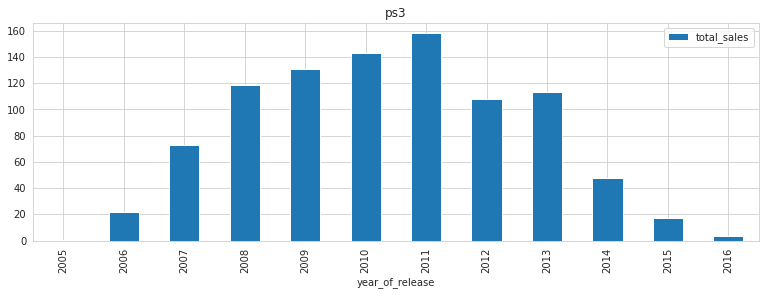

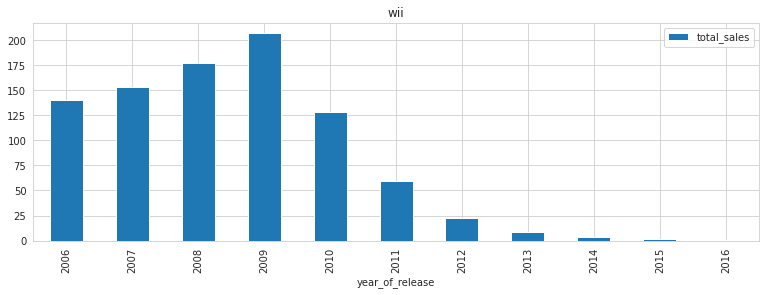

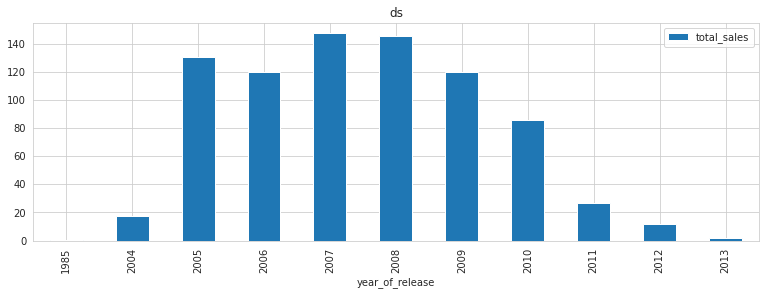

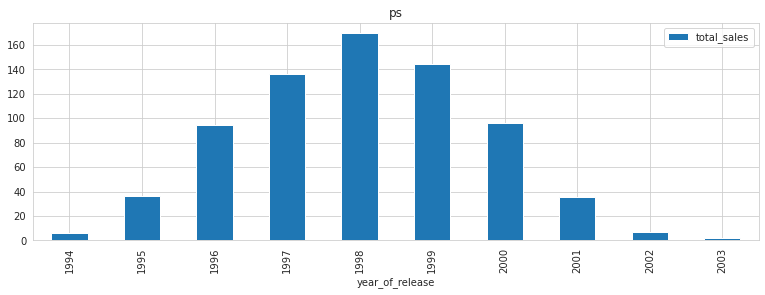

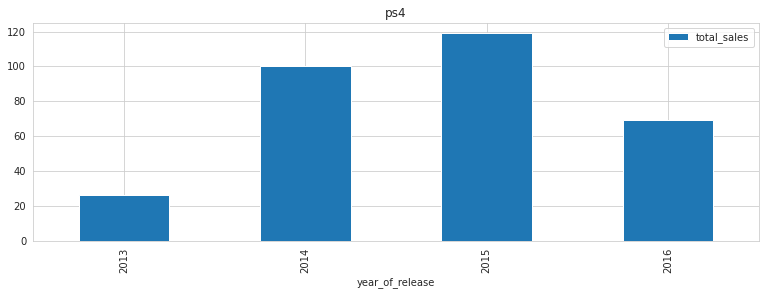

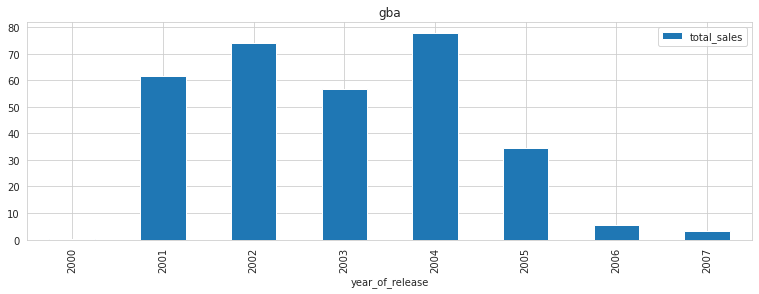

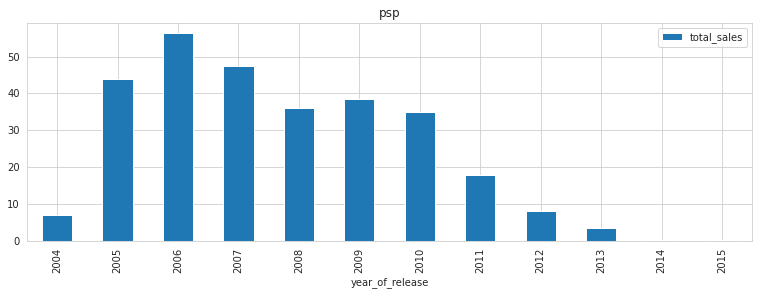

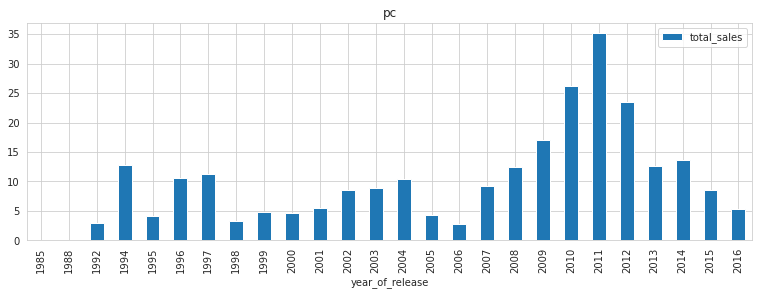

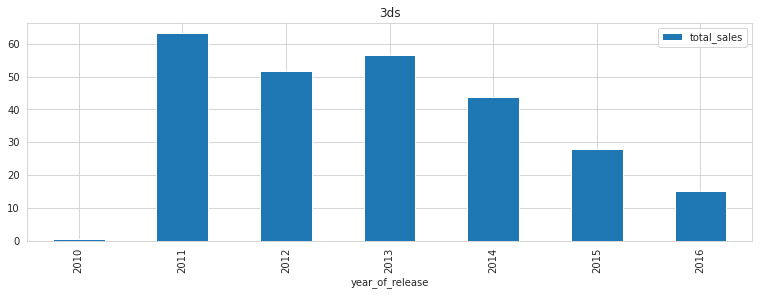

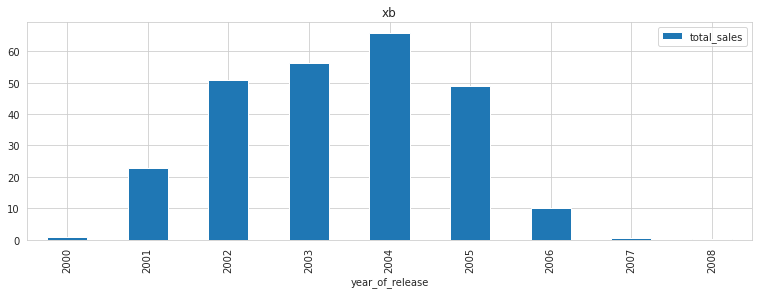

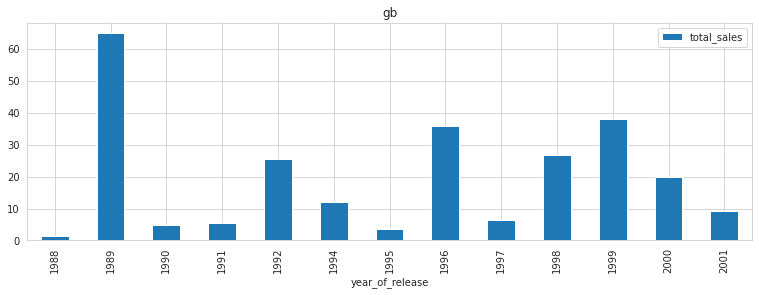

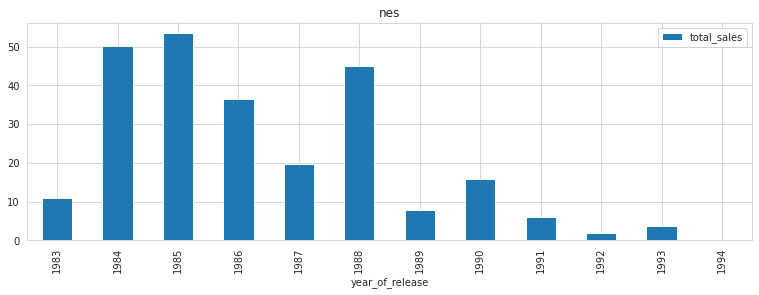

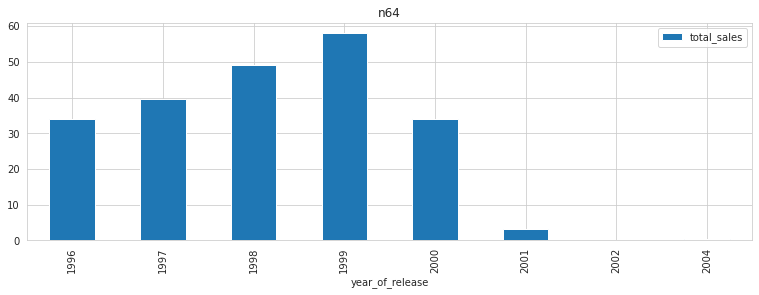

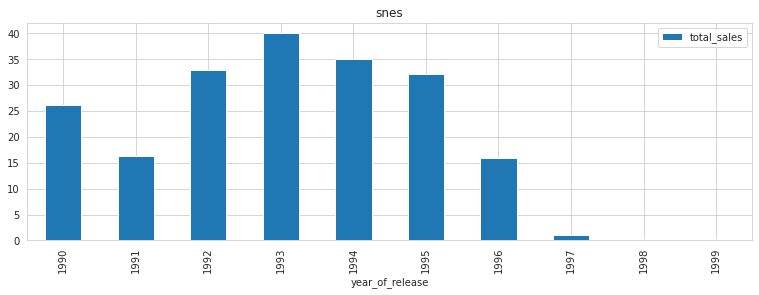

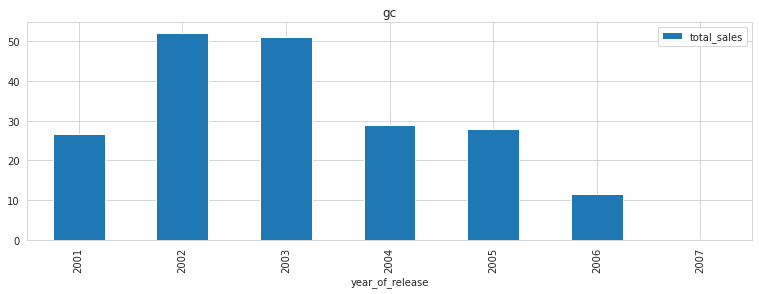

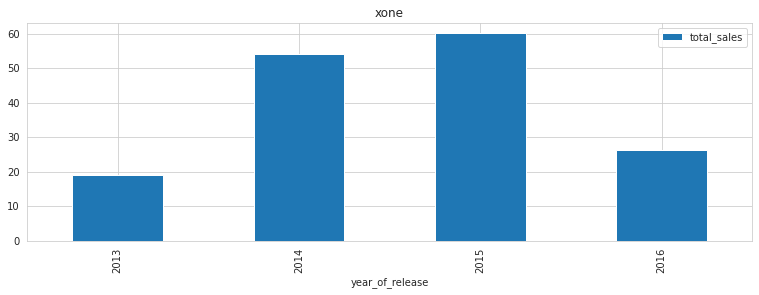

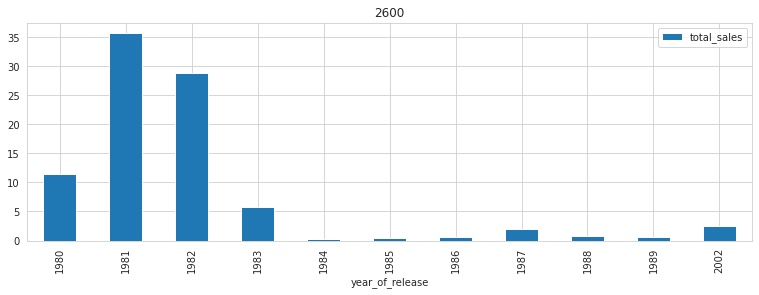

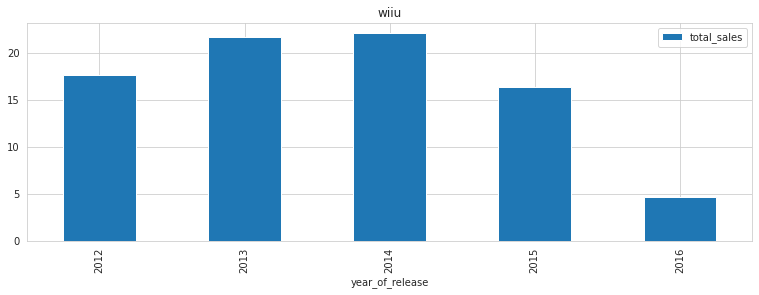

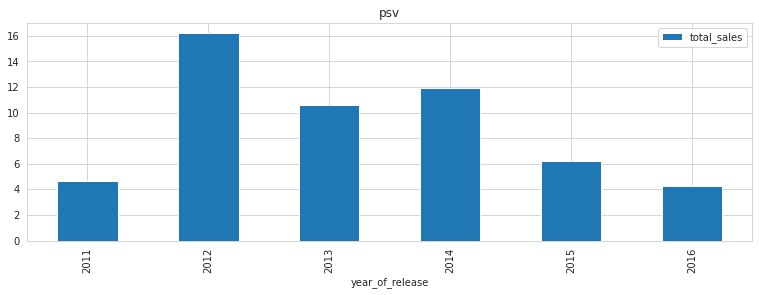

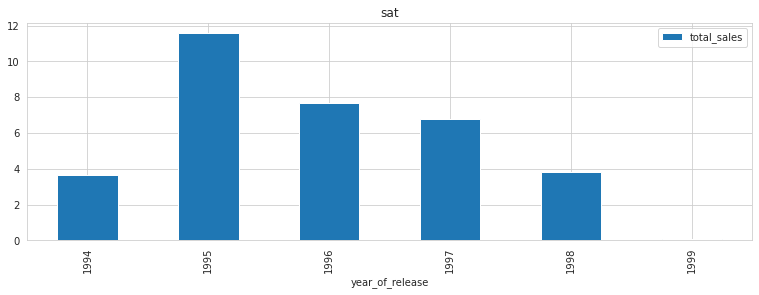

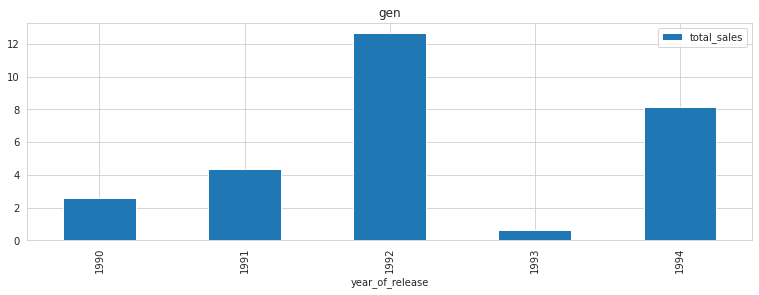

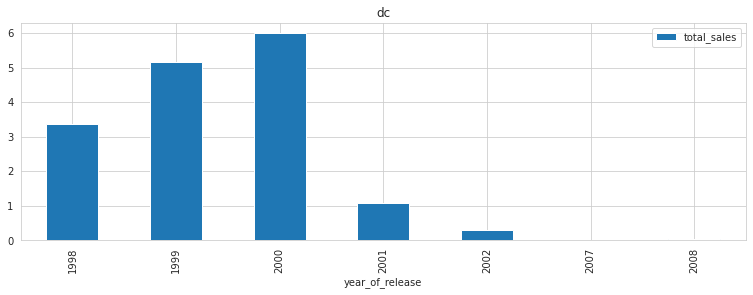

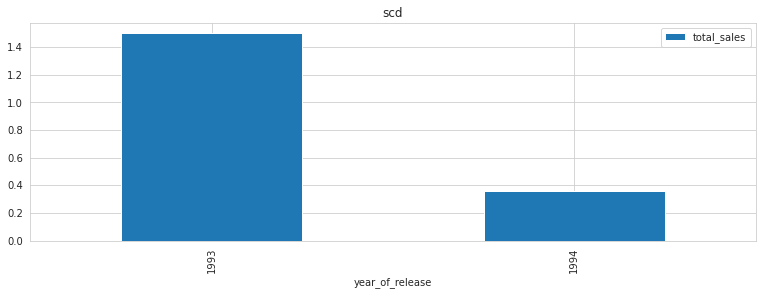

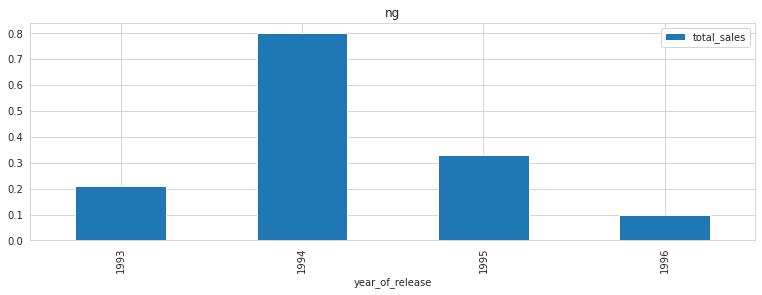

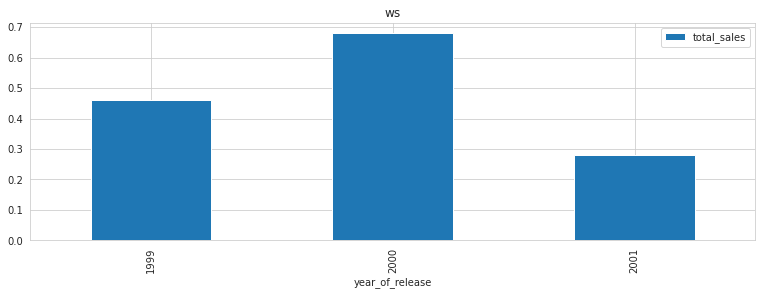

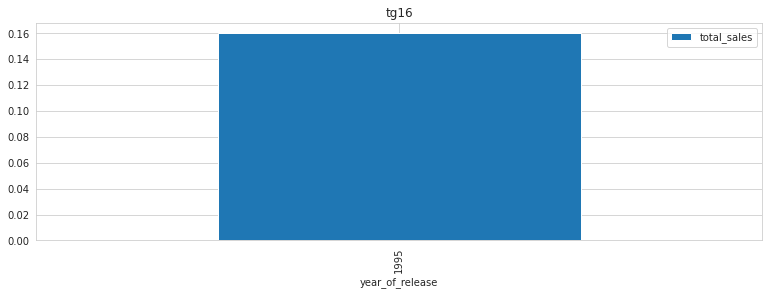

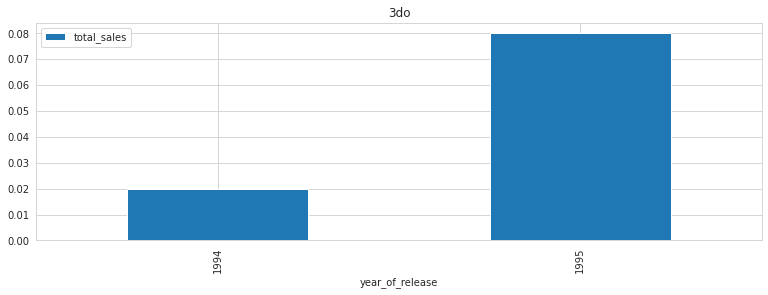

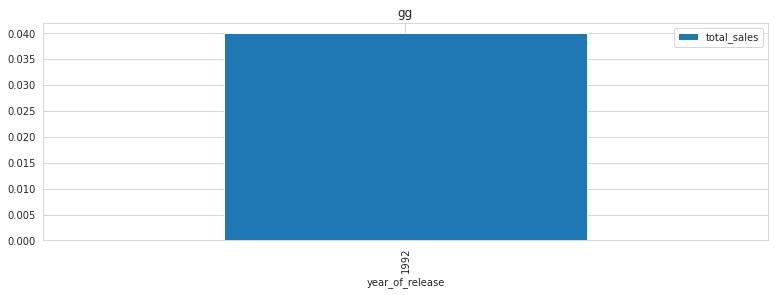

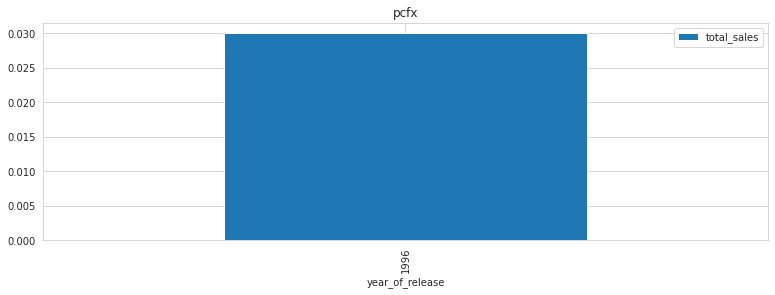

In [20]:
for platform in top_platforms:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)
    plt.show()

Создадим сводную таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.

In [21]:
top_5_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

top_5_platforms

,platform,total_sales
0,ps2,1247.16
1,x360,966.61
2,ps3,935.19
3,wii,903.31
4,ds,804.28


Вывод:
- По диаграммам распределения делаем вывод, что период востребованности платформ длится в среднем 8-10 лет.
- Пятерка лидирующих по продажам за всё время платформ в нашем датасете переживает спад к 2016 году(из-за появления мобильных игр и приложений)


Определим период, за который нужно взять данные для дальнейшего исследования.

Сейчас у нас выделяются 3 явных этапа развития индустрии: рост до 2008 года, пик 2008 и 2009 годов и последующее сокращение рынка. Также большей части платформ уже нет в 2016 году и в построении прогноза на 2017 год они не нужны. При уменьшении периода попадут только последние поколения платформ, а также мы будем рассматривать конечный на данный момент интервал развития игровой индустрии.

In [22]:
period_data = data[data['year_of_release'] > 2014]
period_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,e,7.60
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,NaN,NaN,Unknown,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,the longest 5 minutes,psv,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Сохраним в переменной  только последние поколения платформ и избавимся от выбросов

In [23]:
list_top_6 = ['ps4','xone','pc','wiiu','3ds', 'psv']
games_top_6_platforms = period_data[period_data['platform'].isin(['ps4','xone','pc','wiiu','3ds', 'psv'])]


games_top_6_platforms['total_sales'].describe()

count    941.000000
mean       0.385313
std        1.010358
min        0.010000
25%        0.030000
50%        0.080000
75%        0.260000
max       14.630000
Name: total_sales, dtype: float64

- Посмотрим на количество выпущенных каждой платформой игр, а также на средние глобальные продажи по платформам.

In [24]:
games_top_6_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
pc,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
ps4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
psv,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
wiiu,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
xone,167.0,0.516707,0.965940,0.01,0.035,0.130,0.5550,7.39


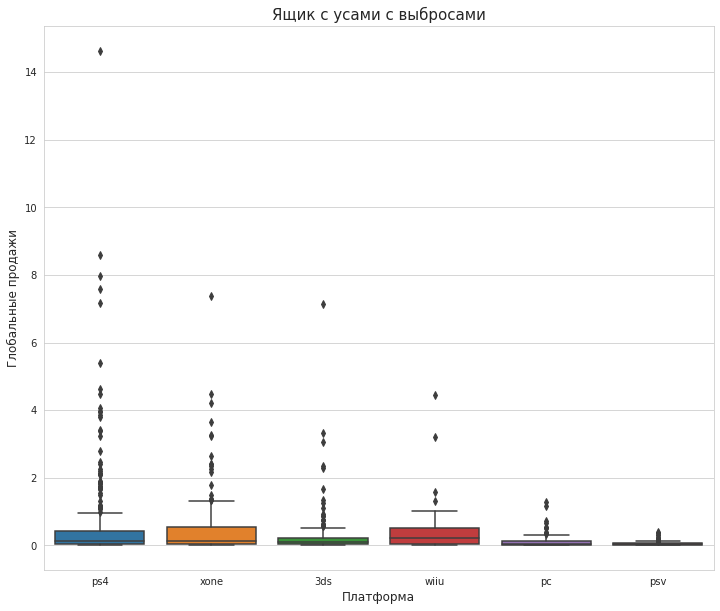

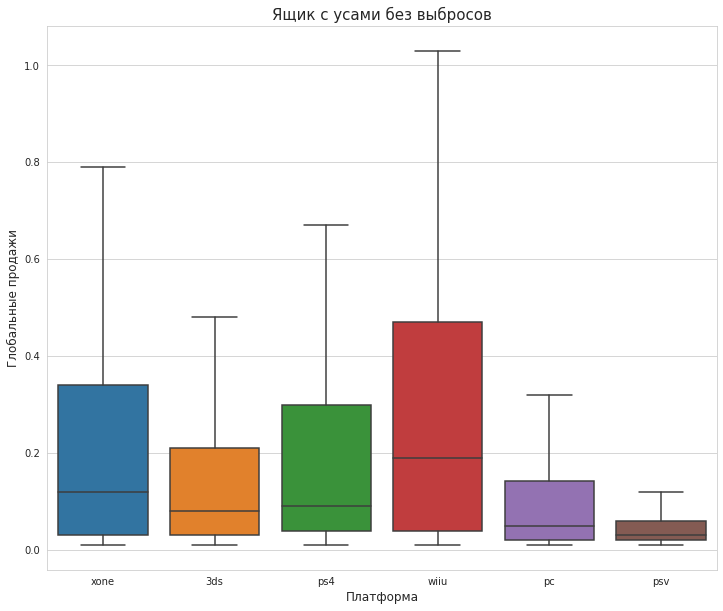

In [25]:
# ящик с усами без выбросов
plt.figure(figsize=(12,10))
sns.boxplot(data=games_top_6_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами с выбросами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

# ящик с усами с выбросами
games_top_6_platforms = games_top_6_platforms[games_top_6_platforms['total_sales']<1.4]
plt.figure(figsize=(12,10))
sns.boxplot(data=games_top_6_platforms, x='platform', y='total_sales', showfliers=False)
plt.title('Ящик с усами без выбросов', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

Вывод:

- По графикам видно, что медиана протекает у всех по разному.
- Больше всех продаж у WiiU, затем XOne, после PS4, 3DS, PC и PSV на последнем месте.
- Положение Xbox One и PlayStation 4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки.
- ПК на данном промежутке времени уступает приставкам.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Так как я люблю функции, поэтому напишу функцию для построения графиков и расчёта корелляции :)

In [45]:
def platform_matrix(name_of_platform):
    platform = period_data[period_data['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 1 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ':  Сильная', critic_correl)
    print('\n')
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 1 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ':  Сильная', correl)
    print('\n')
    
    if 0.1 >= correl >= -0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Корреляция не выявлена', correl)
    if -0.1 >= correl >= -0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая обратная', correl)
    if -0.3 >= correl >= -0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная обратная', correl)
    if -0.5 >= correl >= -0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая обратная', correl)
    if -0.7 >= correl >= -1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная обратная', correl)
    print('\n')

Крутанём нашу функцию  в цикле:

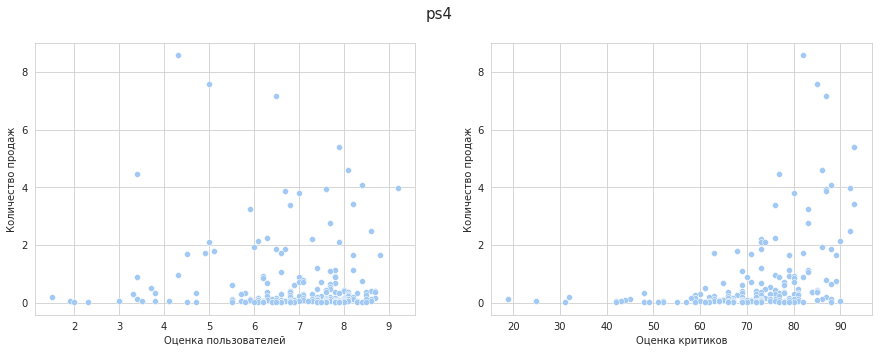

Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.3928485555130601




Корреляция между отзывами пользователей и продажами  PS4 : Корреляция не выявлена -0.05973845712638215




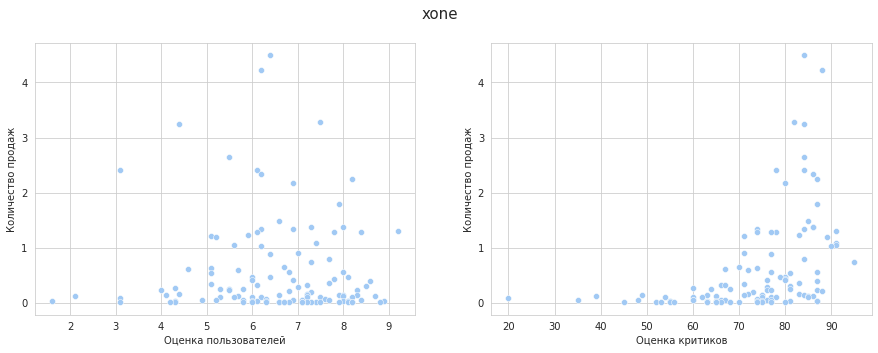

Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.43088874582136805




Корреляция между отзывами пользователей и продажами  XONE : Корреляция не выявлена -0.04146733387366271




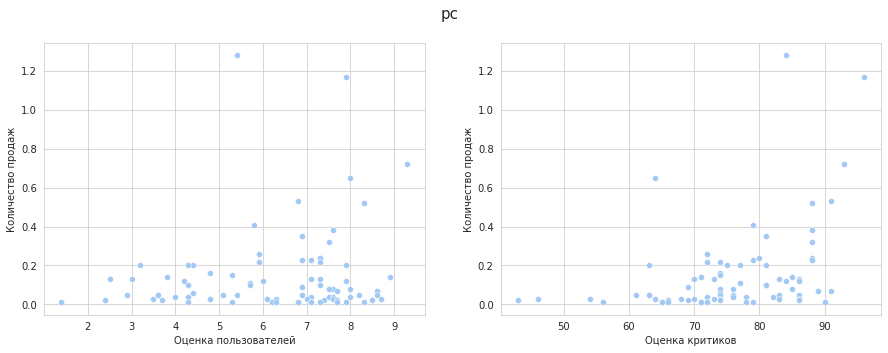

Корреляция между отзывами критиков и игровой платформой  PC : Умеренная 0.3773317477241351


Корреляция между отзывами пользователей и продажами  PC : Слабая 0.15038053045029076






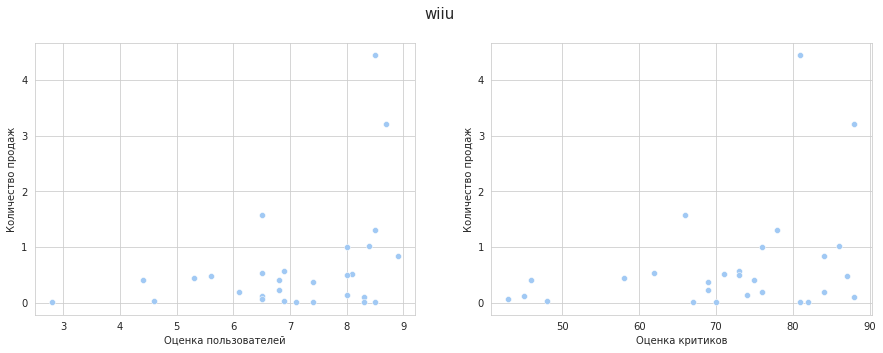

Корреляция между отзывами критиков и игровой платформой  WIIU : Умеренная 0.317045711769622


Корреляция между отзывами пользователей и продажами  WIIU : Умеренная 0.3635185724809445






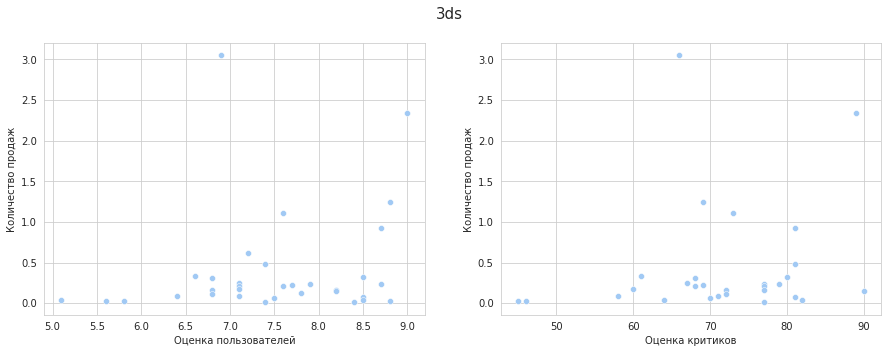

Корреляция между отзывами критиков и игровой платформой  3DS : Слабая 0.17757455046092874


Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.19879627008102982






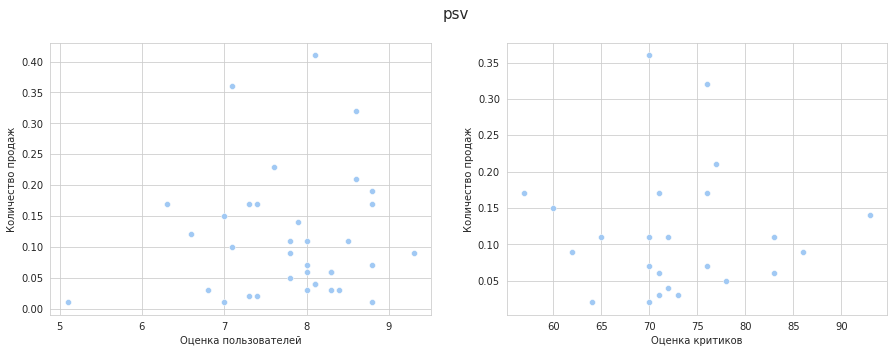





Корреляция между отзывами пользователей и продажами  PSV : Корреляция не выявлена 0.07833473556248864




In [46]:
for platform in list_top_6:
    platform_matrix(platform)

Вывод:

У PS4, Xbox One, WiiU, 3DS не сильная связь между оценками критиков и продажами. А связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет, что меня очень удивило. Только у WiiU корреляция между отзывами пользователей и продажами - уверенная и даже выше, чем корреляция между отзывами критиков и игровой платформой. Это говорит о том, что покупатели прислушиваются больше к критикам, а не к оценкам других пользователей. Но это не относится к платформе WiiU: там отзывы пользователей играют бОльшую роль, чем оценки от критиков.

<div class="alert alert-info"> <b> Исправленый вывод:
     PS4, Xbox One, PC, WiiU уменренная связь между оценками критиков и продажами. Корреляция между оценками пользователей умеренная только у платформы WiiU, у остальных же корреляция слабая, что вновь нам говорит о том, что оценка критиков для пользователей важнее, чем отзывы других пользователей. </b> 
    
 </div>

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

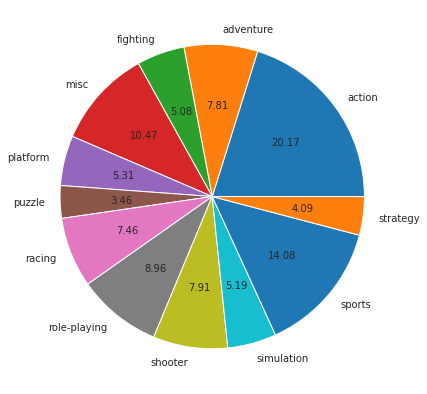

In [28]:
x=data.groupby("genre")['genre'].count()
genres = x.index

plt.figure(figsize=(20,7))
plt.pie(x=x, labels=genres, autopct="%.2f")
plt.show()

Топ 3 жанра в продажах: Action, Role-playng, Shooter. Жанр Sport совсем немного отстаёт от топа, у остальных же показатели значительно хуже.  

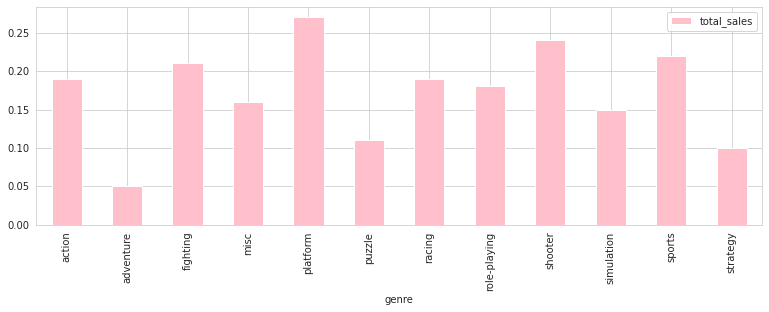

In [29]:
data.groupby('genre')[['total_sales']].median().plot(
        kind='bar', figsize=(13,4), color='pink')
plt.show()

Если же мы рассматриваем медианное значение продаж по жанрам, то картина складывается следующаяя: 1 место занимает жанр Platform, на втором месте Shooter, а на третьем Sports. 

#### Вывод по исследовательскому анализу данных

- Количество игр на игровые приставки и компьютеры начало расти с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
- Средняя жизнь игровой платформы составляет 8-10 лет.
- Больше всего было продано игр на Sony Playstation и Xbox 360.
- У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.
- Самый популярный жанр за последние 10 лет: 'Action'.

### Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5), жанры (топ-5), влияние рейтинга ESRB на продажи:

In [30]:
#Функция для создания сводных таблиц за последние 2 года
def user_portrait_2016(row, title):
    temp = data[data['year_of_release']>2014]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        display(ppivot)

        sns.set_palette("pastel")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

#### Портрет пользователя North America

,platform,na_sales
0,ps4,63.86
1,xone,50.30
2,3ds,10.31
3,wiiu,8.86
4,x360,8.05


,genre,na_sales
0,shooter,48.18
1,action,33.68
2,sports,26.31
3,role-playing,19.82
4,misc,5.58


,rating,na_sales
0,m,47.03
1,Unknown,37.44
2,e,26.59
3,t,22.86
4,e10+,17.87


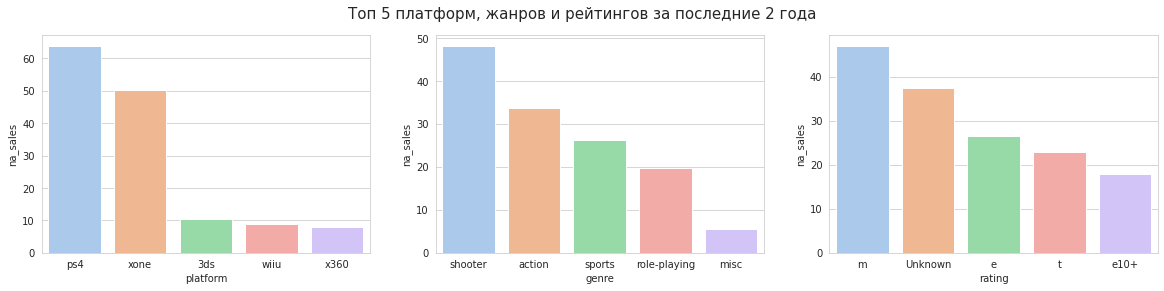

In [31]:
user_portrait_2016('na_sales','Топ 5 платформ, жанров и рейтингов за последние 2 года')

Вывод:

Мы взяли данные за последние 2 года и видим следующее:

1. Топ игровых приставок выглядит таким образом : PS4, Xone, 3DS, WiiU, X360.
2. Топ жанров игр: Shooter, Action, Sports, Role-Playing, Misc.
3. Топ рейтингов игр : "От 17 и выше" , "для всех", "от 13 и выше" и для лиц старше 10 лет. На втором месте расположились игры, в которых не указан рейтинг.

#### Портрет пользователя European Union

,platform,na_sales
0,ps4,63.86
1,xone,50.30
2,3ds,10.31
3,wiiu,8.86
4,x360,8.05


,genre,na_sales
0,shooter,48.18
1,action,33.68
2,sports,26.31
3,role-playing,19.82
4,misc,5.58


,rating,na_sales
0,m,47.03
1,Unknown,37.44
2,e,26.59
3,t,22.86
4,e10+,17.87


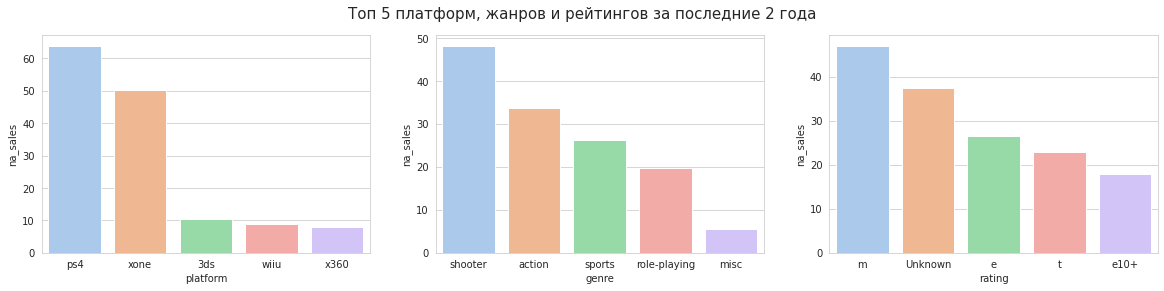

In [32]:
user_portrait_2016('na_sales','Топ 5 платформ, жанров и рейтингов за последние 2 года')

Вывод:

Мы взяли данные за последние 2 года и видим следующее:

1. Топ игровых приставок выглядит таким образом : PS4, Xone, 3DS, WiiU, Х360.
2. Топ жанров игр: Shooter, Action, Sports,  Role-Playing, Misc.
3. Топ рейтингов: "От 17 и выше" , "Для всех" , "от 13 и выше", "для лиц старше 10 лет". На втором месте так же игры без указания рейтинга.

#### Портрет пользователя Japanese

,platform,jp_sales
0,3ds,23.55
1,ps4,12.05
2,psv,8.41
3,ps3,4.97
4,wiiu,4.12


,genre,jp_sales
0,action,23.05
1,role-playing,13.41
2,shooter,3.79
3,misc,3.19
4,adventure,2.22


,rating,jp_sales
0,Unknown,32.89
1,t,7.70
2,e,5.25
3,m,4.29
4,e10+,3.27


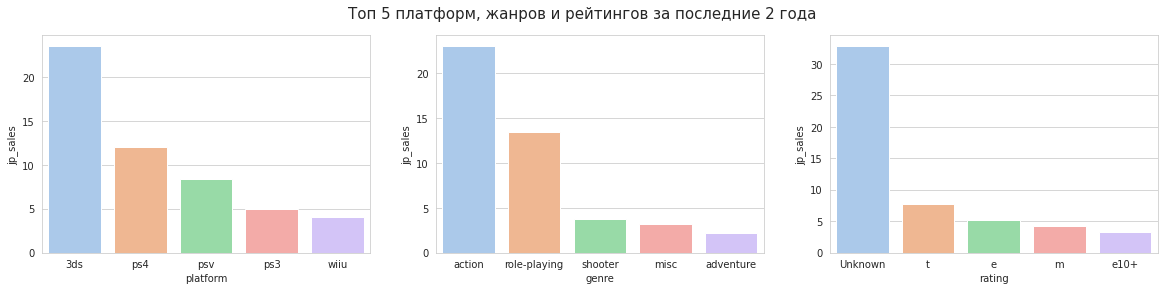

In [33]:
user_portrait_2016('jp_sales','Топ 5 платформ, жанров и рейтингов за последние 2 года')

Вывод:

Мы взяли данные за последние 2 года и видим следующее:

1. Топ игровых приставок выглядит таким образом : 3DS, PS4, PSV, PS3, WiiU.
2. Топ жанров игр: Action, Role-Playing, Shooter, Misc, Adventure.
3. Топ рейтингов: На первом месте игры без уазания рейтинга, далее "От 13 и выше", "Для всех", "От 17 и выше" и "для лиц старше 10 лет".

Общий вывод по составлению портрета пользователя:

Данные за последние 2 года:

- Севернaя Америка:
1. Топ игровых приставок выглядит таким образом : PS4, Xone, 3DS, WiiU, X360.
2. Топ жанров игр: Shooter, Action, Sports, Role-Playing, Misc.
3. Топ рейтингов игр : "От 17 и выше" , "для всех", "от 13 и выше" и для лиц старше 10 лет. На втором месте расположились игры, в которых не указан рейтинг.

- Европа:
1. Топ игровых приставок выглядит таким образом : PS4, Xone, 3DS, WiiU, Х360.
2. Топ жанров игр: Shooter, Action, Sports,  Role-Playing, Misc.
3. Топ рейтингов: "От 17 и выше" , "Для всех" , "от 13 и выше", "для лиц старше 10 лет". На втором месте так же игры без указания рейтинга.

- Япония:
1. Топ игровых приставок выглядит таким образом : 3DS, PS4, PSV, PS3, WiiU.
2. Топ жанров игр: Action, Role-Playing, Shooter, Misc, Adventure.
3. Топ рейтингов: На первом месте игры без уазания рейтинга, далее "От 13 и выше", "Для всех", "От 17 и выше" и "для лиц старше 10 лет".

Для прогноза будущих продаж мы взяли данные за последние 2 года, потому что в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе можно захватить уже отжившие тренды. Но и слишком короткий период тоже брать не стоит.Поэтому 2 года - самый оптимальный период.
(Признаюсь,скопипастила:))

### Проверка гипотез

Гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.    

#### Сформулируем нулевую и альтернативную гипотезу для "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые":

- Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [34]:
#сохраним в переменных нужные нам данные и посчитаем среднее для платформ:
hyp_xone = data[(data['platform']=='xone') & (data['year_of_release']>2014)]['user_score']
hyp_pc = data[(data['platform']=='pc') & (data['year_of_release']>2014)]['user_score']

#среднее для XONE
print(hyp_xone.mean())
#среднее для PC
print(hyp_pc.mean())

6.542148760330578
6.296428571428573


In [35]:
# Посчитаем дисперсию для XONE
np.var(data[data['platform']=='xone']['user_score'])

1.8965188383045526

In [36]:
# Посчитаем дисперсию для PC
np.var(data[data['platform']=='pc']['user_score'])

2.3318329936123363

Так как у нас двухсторонняя гипотеза(проверка среднего двух независимых выборок) мы будем использовать тест 'ttest_ind':  

In [37]:
alpha = .01

results = st.ttest_ind(hyp_xone.dropna(), hyp_pc.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


- Вывод:
Значение p-value равно чуть меньше 3%. Таким образом, не получилось опровергнуть нулевую гипотезу.

#### Сформулируем нулевую и альтернативную гипотезу для "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.":

- Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [38]:
#сохраним данные с оценками пользователей в нужных нам жанрах и посчитаем среднее по этим жанрам:
action_hyp = data[(data['genre']=='action') & (data['year_of_release']>2014)]['user_score']
sports_hyp = data[(data['genre']=='sports') & (data['year_of_release']>2014)]['user_score']

print(action_hyp.mean())
print(sports_hyp.mean())

6.808290155440415
5.198780487804878


In [39]:
# Посчитаем дисперсию для Action:
np.var(data[data['genre']=='action']['user_score'])

2.023633788189832

In [40]:
# Посчитаем дисперсию для Sports:
np.var(data[data['genre']=='sports']['user_score'])

2.5988710140311415

Так как у нас двухсторонняя гипотеза(проверка среднего двух независимых выборок) мы будем использовать тест 'ttest_ind':  

In [41]:
alpha = .01

results = st.ttest_ind(action_hyp.dropna(), sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


- Вывод:
Получив p-value, мы отвергли нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинаковые средние рейнтинги по двум жанрам.

### Общий вывод

Проделана работа:

- Подготовлены данные: 
    Стобцы и данные переведены в нижний регистр;
    Данные приведены в нужный нам тип данных; 
    Обработаны пропуски в столбце year_of_released и разобрались с аббревиатурой tbd(заменено на NaN).

- Проведён анализ:
    Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года.
    С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр.
    За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS. Также было выявлено,
    что средняя продолжительность жизни игровой приставки составляет порядка 10 лет.
    У платформ лидеров наблюдается взаимосвязь между продажами и оценками критиков. 
    Пользовательские оценки не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей. 
    Самый популярный жанр за последние 10 лет: 'Action'.

- Составлены портреты пользователей из разных регионов за 2 года:
    
    
    - Данные за 2 года:
    1. Северная Америка:
     Топ игровых приставок выглядит таким образом : PS4, Xone, 3DS, WiiU, X360.
     Топ жанров игр: Shooter, Action, Sports, Role-Playing, Misc.
     Топ рейтингов игр : "От 17 и выше" , "для всех", "от 13 и выше" и для лиц старше 10 лет. На втором месте расположились игры, в которых не указан рейтинг.

    2. Европа:
    Топ игровых приставок выглядит таким образом : PS4, Xone, 3DS, WiiU, Х360.
    Топ жанров игр: Shooter, Action, Sports, Role-Playing, Misc.
    Топ рейтингов: "От 17 и выше" , "Для всех" , "от 13 и выше", "для лиц старше 10 лет". На втором месте так же игры без указания рейтинга.

    3. Япония:
    Топ игровых приставок выглядит таким образом : 3DS, PS4, PSV, PS3, WiiU.
    Топ жанров игр: Action, Role-Playing, Shooter, Misc, Adventure.
    Топ рейтингов: На первом месте игры без уазания рейтинга, далее "От 13 и выше", "Для всех", "От 17 и выше" и "для лиц старше 10 лет".
    
    Для прогноза будущих продаж мы взяли данные за последние 2 года, потому что в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе можно захватить уже отжившие тренды. Но и слишком короткий период тоже брать не стоит.Поэтому 2 года - самый оптимальный период.

- Была проведена проверка гипотез.
    1. Для гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" были сформулированы нулевая и альтернативная гипотезы;
    Посчитаны дисперсия и среднее значение для платформ;
    Выбран тест ttest_ind для проверки гипотезы, так как у нас проверка среднего двух независимых выборок;
    В результате у нас не получилось отвергнуть гипотезу, так как p-value составило меньше 4%.
    
    2. Для гипотезы "Средние пользовательские рейтинги жанров Action и Sports одинаковые" были сформулированы нулевая и альтернативная гипотезы;
    Посчитаны дисперсия и среднее значение для жанров;
    Выбран тест ttest_ind для проверки гипотезы, так как у нас проверка среднего двух независимых выборок;
    В результате мы отвергли нулевую гипотезу.